In [1]:
template1=(8,5)

In [2]:
def Mape(predict, observed):
  absolute_diff_percentage =  abs( (predict - observed) / observed)
  # print(f'Each diff ratio on each hour: {absolute_diff_percentage}')
  sum_abs_diff = sum(absolute_diff_percentage)
  # print()
  # print(f'SUM: {sum_abs_diff}')

  mape = (sum_abs_diff / len(predict))*100 #パーセント表記
  print(f'MAPE : {mape:.1f} %')
  #mape は GroudTruth を基準にしたときの予測値のずれの比率について，全データを計算したときの，データ1つあたりの平均

In [3]:
def RMSE(predict, observed):
    squared_diff = (predict - observed) ** 2
    sum_squared_diff = sum(squared_diff)
    mse = sum_squared_diff / len(predict)
    rmse = mse ** 0.5  # 平方根を取る
    print(f'RMSE : {rmse:.3f}')
    # RMSEはGroundTruthと予測値の差の二乗平均をとったもの

def MSE(predict, observed):
    squared_diff = (predict - observed) ** 2
    sum_squared_diff = sum(squared_diff)
    mse = sum_squared_diff / len(predict)
    print(f'MSE : {mse:.3f}')
    # MSEはGroundTruthと予測値の差の二乗平均

# LSTM

### Import vars from LSTM (with weather, warning) pickle

In [4]:
import pickle
import os

# 読み込み用のパス
pickle_path = (f'/home/shin/lab/00_project/LSTM/pickles/20240924-2045-42/vars_exoTrue.pickle')

# pickleでデータを読み込む
with open(pickle_path, mode='rb') as fi:
    data = pickle.load(fi)

# date
loaded_true_train_start_date = data['train_start_date']
loaded_true_train_end_date = data['train_end_date']
loaded_true_test_start_date = data['test_start_date']
loaded_true_test_end_date = data['test_end_date']

# test set
loaded_true_date_rng = data['date_rng']
loaded_true_df_test_inversed_plt = data['df_test_inversed_plt']
# predicted set
loaded_true_predicted_date_rng = data['predicted_date_rng']
loaded_true_predicted_test_plot_inversed_plt = data['predicted_test_plot_inversed_plt']
# all data
loaded_df_ex = data['df_ex']


# データ加工
import pandas as pd

df_test=pd.DataFrame({'pop':loaded_true_df_test_inversed_plt},index=loaded_true_date_rng)
df_true_LSTM_withexo_predicted=pd.DataFrame({'pop':loaded_true_predicted_test_plot_inversed_plt},index=loaded_true_predicted_date_rng)

### Import vars from LSTM (with only weather) pickle

In [5]:
import pickle
import os

# 読み込み用のパス
pickle_path = (f'/home/shin/lab/00_project/LSTM/pickles/20240920-122548-83.6/vars_exoTrue.pickle')

# pickleでデータを読み込む
with open(pickle_path, mode='rb') as fi:
    data = pickle.load(fi)

# date
loaded_false_train_start_date = data['train_start_date']
loaded_false_train_end_date = data['train_end_date']
loaded_false_test_start_date = data['test_start_date']
loaded_false_test_end_date = data['test_end_date']

# test set
loaded_false_date_rng = data['date_rng']
loaded_false_df_test_inversed_plt = data['df_test_inversed_plt']
# predicted set
loaded_false_predicted_date_rng = data['predicted_date_rng']
loaded_false_predicted_test_plot_inversed_plt = data['predicted_test_plot_inversed_plt']
# all data
loaded_false_df_ex = data['df_ex']


# データ加工
import pandas as pd
# df_test=pd.DataFrame({'pop':loaded_false_df_test_inversed_plt},index=loaded_false_date_rng)
df_false_LSTM_withexo_predicted=pd.DataFrame({'pop':loaded_false_predicted_test_plot_inversed_plt},index=loaded_false_predicted_date_rng)

### Import vars from LSTM (without exo) pickle

In [6]:
import pickle
import os

# 読み込み用のパス
pickle_path = (f'/home/shin/lab/00_project/LSTM/pickles/20240924-0411-16-pop.83.3/vars_exoFalse.pickle')

# pickleでデータを読み込む
with open(pickle_path, mode='rb') as fi:
    data = pickle.load(fi)

# date
# loaded_false_train_start_date = data['train_start_date']
# loaded_false_train_end_date = data['train_end_date']
# loaded_false_test_start_date = data['test_start_date']
# loaded_false_test_end_date = data['test_end_date']

# test set
loaded_pop_date_rng = data['date_rng']
loaded_pop_df_test_inversed_plt = data['df_test_inversed_plt']
# predicted set
loaded_pop_predicted_date_rng = data['predicted_date_rng']
loaded_pop_predicted_test_plot_inversed_plt = data['predicted_test_plot_inversed_plt']
# all data
# loaded_false_df_ex = data['df_ex']


# データ加工
import pandas as pd
# df_test=pd.DataFrame({'pop':loaded_pop_df_test_inversed_plt},index=loaded_pop_date_rng)
df_pop_LSTM_withexo_predicted=pd.DataFrame({'pop':loaded_pop_predicted_test_plot_inversed_plt},index=loaded_pop_predicted_date_rng)

In [7]:
### Import vars from LSTM (wit only weather) pickle
import pickle
import os

# 読み込み用のパス
pickle_path = (f'/home/shin/lab/00_project/LSTM/pickles/20240920-122548-83.6/vars_exoTrue.pickle')

# pickleでデータを読み込む
with open(pickle_path, mode='rb') as fi:
    data = pickle.load(fi)

# date
loaded_false_train_start_date = data['train_start_date']
loaded_false_train_end_date = data['train_end_date']
loaded_false_test_start_date = data['test_start_date']
loaded_false_test_end_date = data['test_end_date']

# test set
loaded_false_date_rng = data['date_rng']
loaded_false_df_test_inversed_plt = data['df_test_inversed_plt']
# predicted set
loaded_false_predicted_date_rng = data['predicted_date_rng']
loaded_false_predicted_test_plot_inversed_plt = data['predicted_test_plot_inversed_plt']
# all data
loaded_false_df_ex = data['df_ex']


# データ加工
import pandas as pd
df_test=pd.DataFrame({'pop':loaded_false_df_test_inversed_plt},index=loaded_false_date_rng)
df_false_LSTM_withexo_predicted=pd.DataFrame({'pop':loaded_false_predicted_test_plot_inversed_plt},index=loaded_false_predicted_date_rng)

### LSTM vs LSTM 

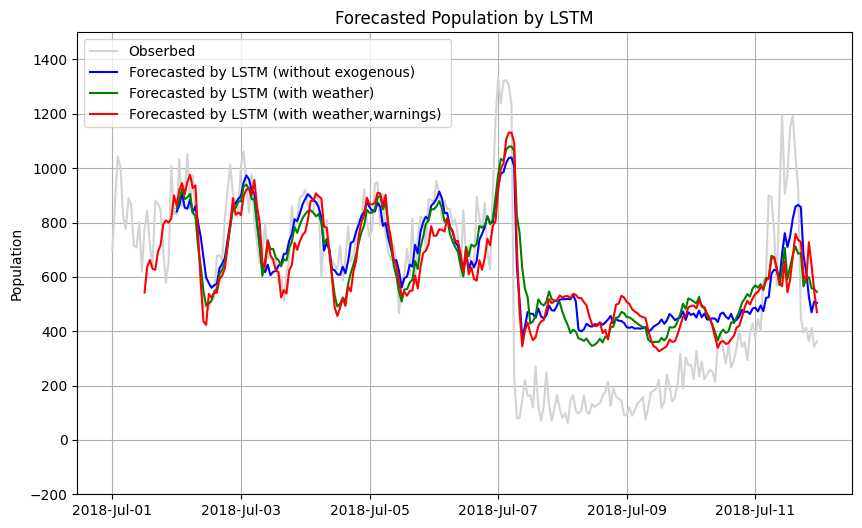

In [8]:
import matplotlib.pyplot as plt

# FigureとAxesを作成
fig, ax = plt.subplots(figsize=(10, 6))  # Figureサイズの設定 (幅, 高さ)

# データのプロット
ax.plot(df_test, label='Obserbed',color='lightgray')
ax.plot(df_pop_LSTM_withexo_predicted, label='Forecasted by LSTM (without exogenous)',color='blue')
ax.plot(df_false_LSTM_withexo_predicted, label='Forecasted by LSTM (with weather)',color='green')
ax.plot(df_true_LSTM_withexo_predicted, label='Forecasted by LSTM (with weather,warnings) ',color='red')


import matplotlib.dates as mdates
formatter = mdates.DateFormatter('%Y-%b-%d')  # 年-月形式で表示
ax.xaxis.set_major_formatter(formatter)

ax.set_ylim(-200, 1500)
ax.legend()
ax.grid()
ax.set_title('Forecasted Population by LSTM')
ax.set_ylabel('Population')

# グラフを表示
plt.show()

In [9]:
print('LSTM with weather,warnings')
Mape(df_true_LSTM_withexo_predicted['pop'],df_test.iloc[-len(df_true_LSTM_withexo_predicted['pop']):,0])
RMSE(df_true_LSTM_withexo_predicted['pop'],df_test.iloc[-len(df_true_LSTM_withexo_predicted['pop']):,0])
print()

print('LSTM with weather')
Mape(df_false_LSTM_withexo_predicted['pop'],df_test.iloc[-240:,0])
RMSE(df_false_LSTM_withexo_predicted['pop'],df_test.iloc[-240:,0])
print()
print('LSTM without exo')
Mape(df_pop_LSTM_withexo_predicted['pop'],df_test.iloc[-240:,0])
RMSE(df_pop_LSTM_withexo_predicted['pop'],df_test.iloc[-240:,0])

LSTM with weather,warnings
MAPE : 83.0 %
RMSE : 222.688

LSTM with weather
MAPE : 83.6 %
RMSE : 216.528

LSTM without exo
MAPE : 83.3 %
RMSE : 209.958


# SARIMAX

### Import vars from SARIMAX (with exo) pickle

In [7]:
## pickleで保存したファイルを読み込み
import pickle

with open(f'./SARIMAX/pickles/20240922-091947/vars.pickle', mode='rb') as fi:
    data = pickle.load(fi)

### 保存した変数を個別に取得 (全て '_loaded' を付けた形に変更)
loaded_true_start_test_date = data['start_test_date']
loaded_true_end_test_date = data['end_test_date']
loaded_true_predict_timeline_list = data['predict_timeline_list']
loaded_true_predict_value_list = data['predict_value_list']
loaded_true_all_concated = data['all_concated']
# loaded_true_train_days = data['train_days']  

# マイナスの値をゼロに書き換える
loaded_true_predict_value_list = [0 if x < 0 else x for x in loaded_true_predict_value_list]

FileNotFoundError: [Errno 2] No such file or directory: './SARIMAX/pickles/20240917-181354/sarimax_model_20180711-23.pickle'

### Import vars from SARIMAX (with training 180 days) pickle

In [6]:
## pickleで保存したファイルを読み込み
import pickle

with open(f'./SARIMAX/pickles/20241015-221621/vars.pickle', mode='rb') as fi:
    data = pickle.load(fi)

### 保存した変数を個別に取得 (全て '_loaded' を付けた形に変更)
loaded_false_start_test_date = data['start_test_date']
loaded_false_end_test_date = data['end_test_date']
loaded_false_predict_timeline_list = data['predict_timeline_list']
loaded_false_predict_value_list = data['predict_value_list']
# loaded_false_all_concated = data['all_concated']
# loaded_false_train_days = data['train_days']  

# マイナスの値をゼロに書き換える
loaded_false_predict_value_list = [0 if x < 0 else x for x in loaded_false_predict_value_list]

#### Set date

In [12]:
from datetime import datetime

train_start_date    = '2018-04-01 00:00:00'
train_end_date      = '2018-06-30 23:59:59'
test_start_date     = '2018-07-01 00:00:00'
test_end_date       = '2018-07-11 23:59:59'

train_st = datetime.strptime(train_start_date, '%Y-%m-%d %H:%M:%S')
train_en = datetime.strptime(train_end_date, '%Y-%m-%d %H:%M:%S')
test_st = datetime.strptime(test_start_date, '%Y-%m-%d %H:%M:%S')
test_en = datetime.strptime(test_end_date, '%Y-%m-%d %H:%M:%S')

train_pop = loaded_true_all_concated[train_st:train_en]['pop_hours']
test_pop  = loaded_true_all_concated[test_st:test_en]['pop_hours']

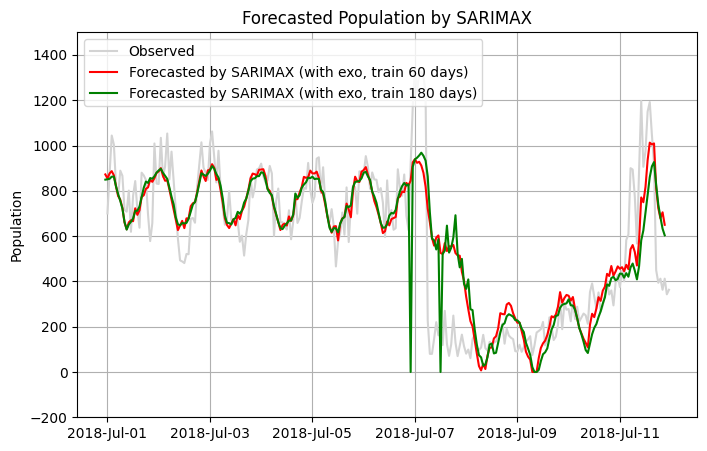

In [13]:
import matplotlib.pyplot as plt

fig, ax,  = plt.subplots(figsize=(8, 5))

ax.plot(loaded_true_all_concated[test_st:test_en]['pop_hours'], label='Observed',color='lightgray')
ax.plot(loaded_true_predict_timeline_list, loaded_true_predict_value_list, label='Forecasted by SARIMAX (with exo, train 60 days)',color='red')
ax.plot(loaded_false_predict_timeline_list, loaded_false_predict_value_list, label='Forecasted by SARIMAX (with exo, train 180 days)',color='green')
ax.set_ylim(-200, 1500)
ax.set_title('Forecasted Population by SARIMAX')
ax.set_ylabel('Population')
ax.grid()
ax.legend()

import matplotlib.dates as mdates
formatter = mdates.DateFormatter('%Y-%b-%d')  # 年-月形式で表示
ax.xaxis.set_major_formatter(formatter)

# グラフの表示
# plt.tight_layout()  # レイアウトを自動調整
plt.show()

In [14]:
print('red')
Mape(loaded_true_predict_value_list,test_pop[:263])
RMSE(loaded_true_predict_value_list,test_pop[:263])

print('green')
Mape(loaded_false_predict_value_list,test_pop[:263])
RMSE(loaded_false_predict_value_list,test_pop[:263])

red
MAPE : 50.6 %
RMSE : 182.413
green
MAPE : 53.4 %
RMSE : 205.632


# Compare

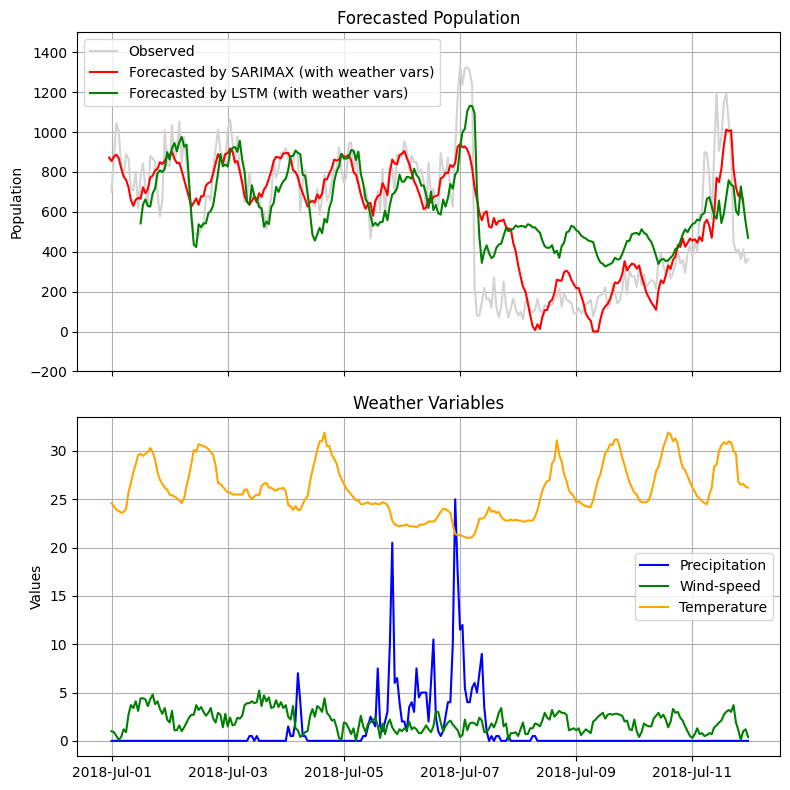

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 2つのグラフを作成 (2行1列)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8),sharex=True)

# 上のグラフ
ax1.plot(loaded_true_all_concated[test_st:test_en]['pop_hours'], label='Observed',color='lightgray')
ax1.plot(loaded_true_predict_timeline_list, loaded_true_predict_value_list, label='Forecasted by SARIMAX (with weather vars)',color='red')
ax1.plot(df_true_LSTM_withexo_predicted, label='Forecasted by LSTM (with weather vars)',color='Green')
ax1.set_ylim(-200, 1500)
ax1.set_title('Forecasted Population')
ax1.set_ylabel('Population')
ax1.grid()
ax1.legend()

# 下のグラフ
ax2.plot(loaded_true_all_concated[test_st:test_en]['y_precipitation'], label='Precipitation', color='blue')
ax2.plot(loaded_true_all_concated[test_st:test_en]['y_windspeed'], label='Wind-speed', color='green')
ax2.plot(loaded_true_all_concated[test_st:test_en]['y_temperature'], label='Temperature', color='orange')
ax2.set_title('Weather Variables')
ax2.set_ylabel('Values')
ax2.grid()
ax2.legend()


# フォーマットを月単位に設定
formatter = mdates.DateFormatter('%Y-%b-%d')  # 年-月形式で表示
ax2.xaxis.set_major_formatter(formatter)

# x軸のラベルを縦向きに回転
# ax2.tick_params(axis='x', rotation=90)

# 両方のグラフに共通のx軸ラベル
# fig.supxlabel('Date')

# グラフの表示
plt.tight_layout()  # レイアウトを自動調整
plt.show()


In [16]:
print('LSTM    with exo ')
Mape(df_true_LSTM_withexo_predicted['pop'],df_test.iloc[-len(df_true_LSTM_withexo_predicted['pop']):,0])
RMSE(df_true_LSTM_withexo_predicted['pop'],df_test.iloc[-len(df_true_LSTM_withexo_predicted['pop']):,0])
print()

print('SARIMAX with exo ')
Mape(loaded_true_predict_value_list,test_pop[:263])
RMSE(loaded_true_predict_value_list,test_pop[:263])

LSTM    with exo 
MAPE : 83.0 %
RMSE : 222.688

SARIMAX with exo 
MAPE : 50.6 %
RMSE : 182.413


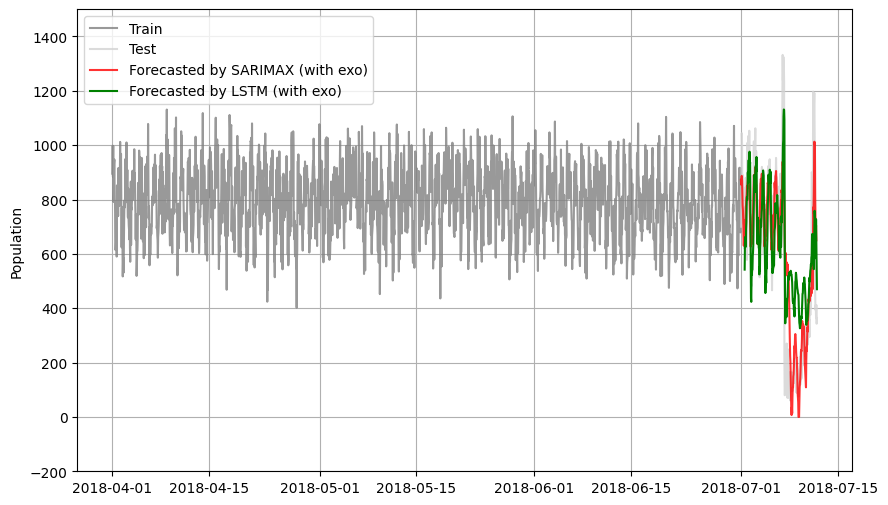

In [17]:
import matplotlib.pyplot as plt
alpha=0.8

# FigureとAxesを作成
fig, ax = plt.subplots(figsize=(10, 6))  # Figureサイズの設定 (幅, 高さ)

# データのプロット
ax.plot(train_pop, label='Train',color='gray',alpha=alpha)
ax.plot(test_pop, label='Test',color='lightgray',alpha=alpha)
ax.plot(loaded_true_predict_timeline_list, loaded_true_predict_value_list, label='Forecasted by SARIMAX (with exo)',color='red',alpha=alpha)
ax.plot(df_true_LSTM_withexo_predicted, label='Forecasted by LSTM (with exo)',color='Green')


# y軸の範囲を設定
ax.set_ylim(-200, 1500)

# 凡例を表示
ax.legend()
ax.grid()
ax.set_ylabel('Population')

# グラフを表示
plt.show()

# BOX plot (LSTM)

In [4]:
import os
import re

# 指定したフォルダ内のmdファイルから値を抽出
def search_md_files_and_extract_values(base_dir):
    mape_list = []
    mse_list = []
    rmse_list = []

    # .mdファイル内の任意の値を抽出する正規表現パターン
    mape_pattern = re.compile(r'MAPE\s+(\d+\.\d+)')
    mse_pattern = re.compile(r'MSE\s+(\d+\.\d+)')

    # 再帰的にフォルダを探索
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.md'):
                # print(file)
                md_file_path = os.path.join(root, file)

                with open(md_file_path, 'r') as md_file:
                    content = md_file.read()

                    # 任意の値を正規表現で抽出
                    mape_match = mape_pattern.search(content)
                    mse_match = mse_pattern.search(content)

                    if mape_match and mse_match:
                        # 抽出した値をリストに保存
                        mape = float(mape_match.group(1))
                        mse = float(mse_match.group(1))

                        mape_list.append(mape)
                        mse_list.append(mse)

    return mape_list, mse_list, rmse_list

# 使用例
base_dir = '/home/shin/lab/00_project/LSTM/pickles/'  # フォルダのベースディレクトリ

# mdファイルを探索し、値を取得
mape_results, mse_results, rmse_results = search_md_files_and_extract_values(base_dir)

# 結果を表示
print("MAPE Values:",len(mape_results), mape_results)
print("MSE Values:",len(mse_results), mse_results)
print("RMSE Values:",len(rmse_results), rmse_results)

MAPE Values: 0 []
MSE Values: 0 []
RMSE Values: 0 []


In [19]:
mape_results

[93.4,
 134.1,
 119.1,
 91.2,
 85.4,
 125.6,
 164.6,
 144.8,
 70.8,
 99.3,
 100.4,
 115.5,
 92.3,
 94.4,
 100.4,
 90.2,
 104.5,
 102.4,
 84.7,
 102.7,
 97.1,
 92.9,
 95.2,
 83.5,
 133.0,
 125.8,
 91.6,
 83.5,
 101.1,
 98.6,
 96.1,
 70.1,
 101.1,
 91.9,
 58.6,
 128.2,
 77.7,
 169.5,
 23.3,
 154.5,
 69.1,
 138.5,
 83.0,
 83.3,
 87.3,
 183.3,
 109.1,
 176.2,
 101.3,
 57.2,
 97.2,
 104.9,
 96.1,
 116.1,
 23.9,
 100.8,
 111.6,
 91.4,
 89.8,
 82.8,
 122.0,
 23.2,
 96.8,
 91.8,
 69.9,
 99.8,
 107.3,
 157.9,
 100.3,
 97.2,
 85.5,
 80.9,
 95.3,
 84.3,
 88.1,
 89.6,
 95.9,
 88.4,
 159.4,
 96.2,
 84.7,
 108.0,
 92.1,
 100.7,
 91.4,
 88.6]

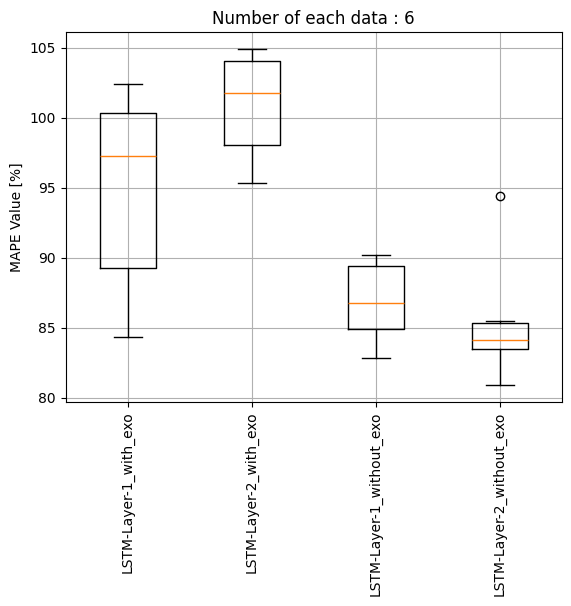

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt

# リスト1とリスト2を作成
list_layer1 = [95.2,100.7,84.3,99.3,102.4,87.3]
list_layer2 = [104.5,104.9,97.1,95.3,102.7,100.8]
list_layer1_without = [89.8,85.4,90.2,88.1,82.8,84.7]
list_layer2_without = [83.5,85.5,84.7,83.5,94.4,80.9]

# 点数のタプル
points = (list_layer1, list_layer2,list_layer1_without,list_layer2_without)

# 箱ひげ図
fig, ax = plt.subplots()

# 複数リストをタプルで渡す
bp = ax.boxplot(points)

# X軸のラベルを設定
ax.set_xticklabels(['LSTM-Layer-1_with_exo', 'LSTM-Layer-2_with_exo','LSTM-Layer-1_without_exo','LSTM-Layer-2_without_exo'],rotation=90)

# タイトルを設定
plt.title('Number of each data : 6')

# グリッドを追加
plt.grid()
plt.ylabel('MAPE Value [%]')

# 描画
plt.show()